In [9]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
path = pathlib.Path()
files = list(path.glob("*.dill"))

In [11]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f.name,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [12]:
results = [parse_file(f) for f in files]

In [13]:
df = pd.DataFrame(results)
df = df.astype('float')

In [14]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.300000,0.857143,0.444444,2.644787,15.224659,8.422481,14546.131836,120.607344,77.784448,799.242094,3.739034,1.933350,20.0,0.20
1,0.461538,0.857143,0.600000,1.060073,6.102284,1.621571,193.921371,13.925565,9.668275,97.409295,0.049847,0.223228,12.0,0.16
2,0.875000,1.000000,0.933333,0.056689,0.326329,0.111771,9.324675,3.053633,2.136554,15.943534,0.002397,0.048950,6.0,0.08
3,0.636364,1.000000,0.777778,0.124298,0.715519,0.270815,21.570360,4.644390,2.923174,32.197813,0.005545,0.074450,10.0,0.08
4,0.777778,1.000000,0.875000,0.211266,1.216147,0.348773,35.790108,5.982483,3.820089,37.782198,0.009200,0.095900,6.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.500000,0.714286,0.588235,2.615166,15.054143,4.691625,439237.875000,662.750231,282.072269,3969.036649,112.904610,10.623964,18.0,0.08
106,0.545455,0.857143,0.666667,1.773897,10.211399,3.333669,238.603531,15.446797,12.273149,52.715179,0.061332,0.247614,6.0,0.20
107,0.583333,1.000000,0.736842,0.574945,3.309656,1.069702,39.806370,6.309229,4.765297,27.936842,0.010232,0.101138,8.0,0.10
108,0.500000,0.714286,0.588235,2.623861,15.104195,4.695807,441856.531250,664.722887,283.397082,3980.462315,113.577721,10.655586,16.0,0.08


<Axes: xlabel='noise', ylabel='dt'>

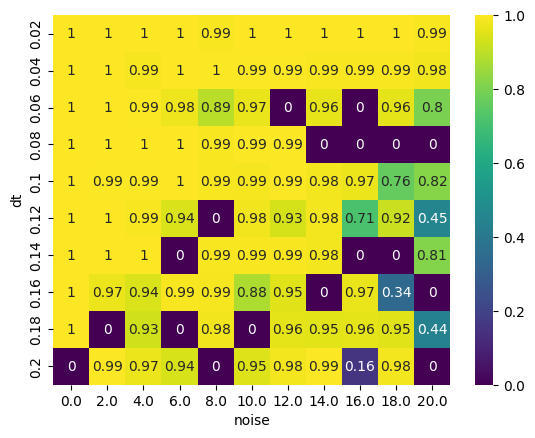

In [15]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

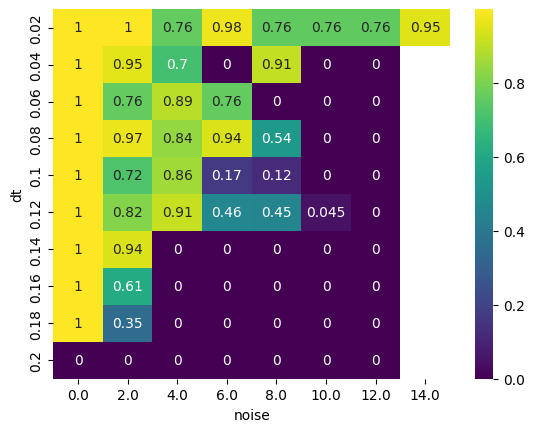

In [10]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
